In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array, load_img
from keras.models import load_model, Model

In [2]:
def load_pickle(filename):
    obj = pickle.load(open(filename + '.pkl', 'rb'))
    return obj

In [3]:
idx_word_dic = load_pickle('idx_word_dic')

In [4]:
tokenizer = load_pickle('tokenizer')
max_length = load_pickle('max_length')

In [3]:
def image_encodings(img):
    
    model = VGG16(include_top=True, weights='imagenet')
    model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    img_encoding = model.predict(img, verbose = 0)
    
    return img_encoding

In [6]:
def generate_captions(model, img, tokenizer, max_len):
    
    caption = 'sos'
    img_encoding = image_encodings(img)
    for _ in range(max_len):
        seq = tokenizer.texts_to_sequences([caption])[0]
        seq = pad_sequences([seq], maxlen)
        yhat = model.predict([img_encoding, seq])
        yhat = np.argmax(yhat)
        pred_word = idx_word_dic[yhat]
        if pred_word == None:
            break
        caption += " " + pred_word
        if pred_word == 'eos':
            break
    
    caption = ' '.join((caption.split()[1:-1]))
        
    return caption

In [52]:
captions_dic = load_pickle("captions_dic")

In [231]:
model = load_model('model_4.h5')

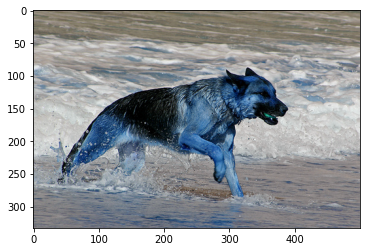

In [251]:
img = r'D:\GBC2\DL1\Project\Data\flickr_8k\Images' + '\\' + "225909073_25c3c33a29.jpg"
plt.imshow(cv2.imread(img))

In [252]:
img_encoding = image_encodings(img)

In [253]:
caption = generate_captions(model, img_encoding, tokenizer, max_length)

In [254]:
caption

'sos a black dog is running through the snow eos'

In [256]:
captions_dic['225909073_25c3c33a29']

['A black and brown dog is running out of the surf .',
 'A wet dog runs through the surf at a beach .',
 'A wet German Shepherd dog is running out of the ocean with a ball in its mouth .',
 'German shepherd running in ocean surf',
 'The German Shepherd is walking in the body of water .']